In [18]:
import numpy as np
import ee
import collections
# collections.Callable = collections.abc.Callable
# ee.Authenticate()
ee.Initialize()

In [23]:
def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

In [24]:
raynp = np.genfromtxt("RayRoi_status_c.csv", delimiter=',', skip_header=1)
raynp = trunc(raynp, 8)
#print(raynp)

In [26]:
mojave_dune_np = np.genfromtxt("Mojave_Dune_status_c.csv", delimiter=',', skip_header=1)
mojave_dune_np = trunc(mojave_dune_np, 8)
#print(mojavenp)

In [27]:
mojave_mountain_np = np.genfromtxt("Mojave_mountain_status_c.csv", delimiter=',', skip_header=1)
mojave_mountain_np = trunc(mojave_mountain_np, 8)
#print(mojave_mountain_np)

In [58]:
canyon_np = np.genfromtxt("Canyon_status_c.csv", delimiter=',', skip_header=1)
canyon_np = trunc(canyon_np, 8)

In [14]:
def normDiff(b5, b6):
    return (b5 - b6) / (b5 + b6)

In [55]:
def band_scores(array):
    new_array = np.empty((0,17), float)
    num = 0
    ex = array
    for row in ex:
        min_lon = row[0]
        min_lat = row[1]
        max_lon = row[2]
        max_lat = row[3]
        
        b5 = row[13]
        b6 = row[14]
        nd = (b5 - b6) / (b5 + b6)
        
        score = 0
        count = 0

        # Finds the index of the neighbors from current square
        right_index = np.where((ex[:, 0] == max_lon) & (ex[:, 1] == min_lat) & (ex[:, 3] == max_lat))
        left_index = np.where((ex[:, 1] == min_lat) & (ex[:, 2] == min_lon) & (ex[:, 3] == max_lat))
        up_index = np.where((ex[:, 0] == min_lon) & (ex[:, 1] == max_lat) & (ex[:, 2] == max_lon))
        down_index = np.where((ex[:, 0] == min_lon) & (ex[:, 2] == max_lon) & (ex[:, 3] == min_lat))
        up_right_index = np.where((ex[:, 0] == max_lon) & (ex[:, 1] == max_lat))
        up_left_index = np.where((ex[:, 1] == max_lat) & (ex[:, 2] == min_lon))
        down_right_index = np.where((ex[:, 0] == max_lon) & (ex[:, 3] == min_lat))
        down_left_index = np.where((ex[:, 2] == min_lon) & (ex[:, 3] == min_lat))

        #Determines the difference from the current value and the neighbor
        right_nd = normDiff(ex[(right_index[0]),13], ex[(right_index[0]),14])
        left_nd = normDiff(ex[(left_index[0]),13], ex[(left_index[0]),14])   
        up_nd = normDiff(ex[(up_index[0]),13], ex[(up_index[0]),14]) 
        down_nd = normDiff(ex[(down_index[0]),13], ex[(down_index[0]),14]) 
        up_right_nd = normDiff(ex[(up_right_index[0]),13], ex[(up_right_index[0]),14]) 
        up_left_nd = normDiff(ex[(up_left_index[0]),13], ex[(up_left_index[0]),14])    
        down_right_nd = normDiff(ex[(down_right_index[0]),13], ex[(down_right_index[0]),14]) 
        down_left_nd = normDiff(ex[(down_left_index[0]),13], ex[(down_left_index[0]),14]) 

        #Determines which from the list of neighbors passes
        neighbors = [right_nd, left_nd, up_nd, down_nd, up_right_nd, up_left_nd, down_right_nd, down_left_nd]
        for x in neighbors:
            if x.size > 0:
                count = count + 1
                #previous: x<0 and ...
                if (abs(x - nd) < 0.015):
                    score = score+1


        score_per = score / count
        
        if(score_per > 0.5):
            # print("start")
            # print(right_nd - nd)
            # print(left_nd - nd)
            # print(up_nd - nd)
            # print(down_nd - nd)
            # print(up_right_nd - nd)
            # print(up_left_nd - nd)
            # print(down_right_nd - nd)
            # print(down_left_nd - nd)
            # print("Count " + str(count))
            # print("Score " + str(score))
            num = num + 1


        # print(score_per)
        new_row = np.append(row, score_per, axis=None)
        new_array = np.append(new_array, np.array([new_row]), axis=0)
    print("Total Count: " + str(num))
    return new_array

In [71]:
new_array = band_scores(canyon_np)
print(canyon_np.shape[0])

Total Count: 7579
13120


In [57]:
test_array = band_scores(mojave_dune_np)
print(raynp.shape[0])

Total Count: 14397
1600


In [ ]:
#np.savetxt("foo.csv", new_array, delimiter=",")

In [61]:
new_array3 = np.empty((0,19), float)
for row in new_array:
    min_lon = row[0]
    min_lat = row[1]
    max_lon = row[2]
    max_lat = row[3]
    
    # Center Lon/Lat positions:
    center_lon = min_lon + (max_lon-min_lon)/2
    center_lat = min_lat + (max_lat-min_lat)/2
    
    new_row = np.append(row, center_lon, axis=None)
    new_row = np.append(new_row, center_lat, axis=None)
    new_array3 = np.append(new_array3, np.array([new_row]), axis=0)
    
print(new_array3)

[[-112.33870397   36.22260019 -112.33591528 ...    1.
  -112.33730962   36.22372479]
 [-112.33591528   36.22260019 -112.33312659 ...    1.
  -112.33452094   36.22372479]
 [-112.33312659   36.22260019 -112.33033789 ...    1.
  -112.33173224   36.22372479]
 ...
 [-112.00987465   35.95490619 -112.00709234 ...    0.8
  -112.0084835    35.95603079]
 [-112.00709234   35.95490619 -112.00431004 ...    0.8
  -112.00570119   35.95603079]
 [-112.00431004   35.95490619 -112.00152773 ...    1.
  -112.00291888   35.95603079]]


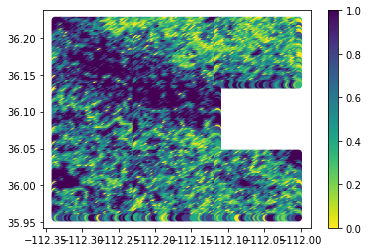

In [63]:
import matplotlib.pyplot as plt
fig=plt.figure()
#sc = plt.scatter(new_array3[0,:],new_array[1,:],c=new_array[2,:],vmin=0,vmax=8)
sc = plt.scatter(new_array3[:,17], new_array3[:,18], c=new_array3[:,16], cmap='viridis_r', vmin=0, vmax=1)
#sc = plt.scatter(new_array3[:,5],new_array3[:,6],c=new_array3[:,7],vmin=0,vmax=8)
plt.colorbar(sc)
plt.show()

In [67]:
print(new_array)

[[-112.33870397   36.22260019 -112.33591528 ...    0.11360889
            nan    1.        ]
 [-112.33591528   36.22260019 -112.33312659 ...    0.16495687
            nan    1.        ]
 [-112.33312659   36.22260019 -112.33033789 ...    0.22751125
            nan    1.        ]
 ...
 [-112.00987465   35.95490619 -112.00709234 ...    0.16858277
            nan    0.8       ]
 [-112.00709234   35.95490619 -112.00431004 ...    0.16671091
            nan    0.8       ]
 [-112.00431004   35.95490619 -112.00152773 ...    0.15922566
            nan    1.        ]]


In [ ]:
# Convert to a Feature Collection
# Create a list of Features for areas, with score as property

region_list = []
for row in new_array:
    region = ee.Geometry.Polygon([[[float(row[0]), float(row[3])],
                                  [float(row[0]), float(row[1])],
                                  [float(row[2]), float(row[1])],
                                  [float(row[2]), float(row[3])]]])
    f = ee.Feature(region).set('band_score', float(row[16]))
    region_list.append(f)

# Wrap feature list in a Feature Collection
fc = ee.FeatureCollection(region_list)

# Export the Feature Collection to Google Earth Engine (GEE)
task = ee.batch.Export.table.toAsset(**{
  'collection': fc,
  'description':'compiled_results_with_scores',
  'assetId': 'users/rishiAgarwal/compiledResultScores', # change to your GEE Asset path and a unique name (will not overwrite already existing assets, so old names cannot be reused)
});

task.start()